## Importing Required Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Retrieving the Data

In [3]:
data=pd.read_csv("./PROJECT_IPL_1_Edited.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Player Name                                            60 non-null     object
 1   Base Price (in Lakhs Rupees)                           60 non-null     int64 
 2   Price Paid (in Lakhs Rupees)                           60 non-null     int64 
 3   Status                                                 60 non-null     object
 4   Bought by                                              60 non-null     object
 5   Previous IPL Teams                                     37 non-null     object
 6   Country                                                60 non-null     object
 7   Role                                                   60 non-null     object
 8   Batting Style                                          39 non-

## Renaming the Columns

In [5]:
data.rename(columns={'Player Name':'Player_Name','Base Price (in Lakhs Rupees)':'Base_Price','Price Paid (in Lakhs Rupees)':'Price_Paid','Status':'Status','Bought by':'Bought_by','Previous IPL Teams':'Previous_IPL_Teams','Country':'Country','Role':'Role','Batting Style':'Batting_Style','Bowling Style':'Bowling_Style','Batting Order':'Batting_Order','Capped or Uncapped at Internationals (during Auction)':'Capped_or_Uncapped'},inplace='True')

In [6]:
data.loc[data["Role"] == "Fast Bowler", "Role"] = "Seam Bowler"

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Player_Name         60 non-null     object
 1   Base_Price          60 non-null     int64 
 2   Price_Paid          60 non-null     int64 
 3   Status              60 non-null     object
 4   Bought_by           60 non-null     object
 5   Previous_IPL_Teams  37 non-null     object
 6   Country             60 non-null     object
 7   Role                60 non-null     object
 8   Batting_Style       39 non-null     object
 9   Bowling_Style       46 non-null     object
 10  Batting_Order       39 non-null     object
 11  Capped_or_Uncapped  60 non-null     object
dtypes: int64(2), object(10)
memory usage: 5.8+ KB


# Team Wise Analysis:

## Chennai Super Kings (CSK)

### Listing out players bought by CSK

In [8]:
csk=data.groupby('Bought_by').get_group('CSK')
csk

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
4,Bhagath Varma,20,20,Sold,CSK,NaN,India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped
5,C Hari Nishanth,20,20,Sold,CSK,NaN,India,Batsman,Left,NaN,Top,Uncapped
7,Cheteshwar Pujara,50,50,Sold,CSK,"RCB, KKR, PBKS",India,Batsman,Right,NaN,Top,Capped
14,Harishankar Reddy,20,20,Sold,CSK,NaN,India,Seam Bowler,NaN,Right Medium,NaN,Uncapped
22,Krishnappa Gowtham,20,925,Sold,CSK,"MI, RR, PBKS",India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped
29,Moeen Ali,200,700,Sold,CSK,RCB,England,Batting All Rounder,Left,Right Offbreak,Top,Capped
59,Robin Uthappa,0,300,Transfer,CSK,"MI, RCB, PWI, KKR, RR",India,Batsman,Right,NaN,Top,Capped


### Visualization of amount at which the players have been bought

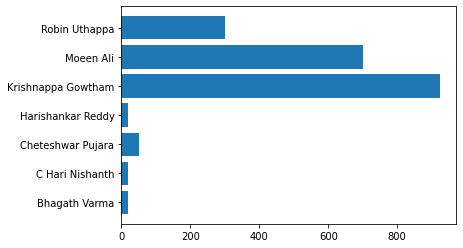

In [9]:
x=list(csk['Player_Name']);
y=list(csk['Price_Paid']);
plt.barh(x,y);

### List of Batsmen bought by CSK

In [10]:
csk_bats=csk[csk['Role'].str.contains('Batsman')]
csk_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
5,C Hari Nishanth,20,20,Sold,CSK,NaN,India,Batsman,Left,NaN,Top,Uncapped
7,Cheteshwar Pujara,50,50,Sold,CSK,"RCB, KKR, PBKS",India,Batsman,Right,NaN,Top,Capped
59,Robin Uthappa,0,300,Transfer,CSK,"MI, RCB, PWI, KKR, RR",India,Batsman,Right,NaN,Top,Capped


### List of Bowlers bought by CSK

In [11]:
csk_bowl=csk[csk['Role'].str.contains('Bowler')]
csk_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
14,Harishankar Reddy,20,20,Sold,CSK,NaN,India,Seam Bowler,NaN,Right Medium,NaN,Uncapped


### List of All Rounders bought by CSK

In [12]:
csk_all=csk[csk['Role'].str.contains('All Rounder')]
csk_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
4,Bhagath Varma,20,20,Sold,CSK,NaN,India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped
22,Krishnappa Gowtham,20,925,Sold,CSK,"MI, RR, PBKS",India,Bowling All Rounder,Right,Right Offbreak,Lower,Uncapped
29,Moeen Ali,200,700,Sold,CSK,RCB,England,Batting All Rounder,Left,Right Offbreak,Top,Capped


## TEAM ANALYSIS - CHENNAI SUPER KINGS

In [13]:
def formpri (a):
    print("Player Name:             ",a['Player_Name'].to_string(index=False))
    print("Country:                 ",a['Country'].to_string(index=False))
    print("Bought for (in crores):  ",(a['Price_Paid']/100).to_string(index=False))
    print("Role:                    ",a['Role'].to_string(index=False))

In [14]:
print("Total amount spent during auction: ",(csk['Price_Paid'].sum())/100," crores")

Total amount spent during auction:  20.35  crores


In [15]:
print("Highest bid by Chennai Super Kings: ")
print()
formpri(csk[csk['Price_Paid']==csk['Price_Paid'].max()])

Highest bid by Chennai Super Kings: 

Player Name:              Krishnappa Gowtham
Country:                  India
Bought for (in crores):   9.25
Role:                     Bowling All Rounder


In [16]:
print("Highest Indian bid by Chennai Super Kings: ")
print()
formpri(csk[csk['Price_Paid']==csk[csk['Country']=='India']['Price_Paid'].max()])

Highest Indian bid by Chennai Super Kings: 

Player Name:              Krishnappa Gowtham
Country:                  India
Bought for (in crores):   9.25
Role:                     Bowling All Rounder


In [17]:
print("Highest Foreign bid by Chennai Super Kings: ")
print()
formpri(csk[csk['Price_Paid']==csk[csk['Country']!='India']['Price_Paid'].max()])

Highest Foreign bid by Chennai Super Kings: 

Player Name:              Moeen Ali
Country:                  England
Bought for (in crores):   7.0
Role:                     Batting All Rounder


In [18]:
print("Amount Spent on each Department: ")
print()
print((csk.groupby('Role')['Price_Paid'].sum()/100).to_string())

Amount Spent on each Department: 

Role
Batsman                3.70
Batting All Rounder    7.00
Bowling All Rounder    9.45
Seam Bowler            0.20


In [19]:
print("Highest batsman bid by Chennai Super Kings: ")
print()
formpri(csk_bats[csk_bats['Price_Paid']==csk_bats['Price_Paid'].max()])

Highest batsman bid by Chennai Super Kings: 

Player Name:              Robin Uthappa
Country:                  India
Bought for (in crores):   3.0
Role:                     Batsman


In [20]:
print("Highest bowler bid by Chennai Super Kings: ")
print()
formpri(csk_bowl[csk_bowl['Price_Paid']==csk_bowl['Price_Paid'].max()])

Highest bowler bid by Chennai Super Kings: 

Player Name:              Harishankar Reddy
Country:                  India
Bought for (in crores):   0.2
Role:                     Seam Bowler


In [21]:
print("Highest all rounder bid by Chennai Super Kings: ")
print()
formpri(csk_all[csk_all['Price_Paid']==csk_all['Price_Paid'].max()])

Highest all rounder bid by Chennai Super Kings: 

Player Name:              Krishnappa Gowtham
Country:                  India
Bought for (in crores):   9.25
Role:                     Bowling All Rounder


In [22]:
print("Average amount spent on each department: ")
print()
print((csk.groupby('Role')['Price_Paid'].mean()/100).to_string())

Average amount spent on each department: 

Role
Batsman                1.233333
Batting All Rounder    7.000000
Bowling All Rounder    4.725000
Seam Bowler            0.200000


In [23]:
print("Highest capped bid by Chennai Super Kings: ")
print()
formpri(csk[csk['Price_Paid']==csk[csk['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()])

Highest capped bid by Chennai Super Kings: 

Player Name:              Moeen Ali
Country:                  England
Bought for (in crores):   7.0
Role:                     Batting All Rounder


In [24]:
print("Highest uncapped bid by Chennai Super Kings: ")
print()
formpri(csk[csk['Price_Paid']==csk[csk['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()])

Highest uncapped bid by Chennai Super Kings: 

Player Name:              Krishnappa Gowtham
Country:                  India
Bought for (in crores):   9.25
Role:                     Bowling All Rounder


Visualization of distribution of Amount spent by CSK on each department: 



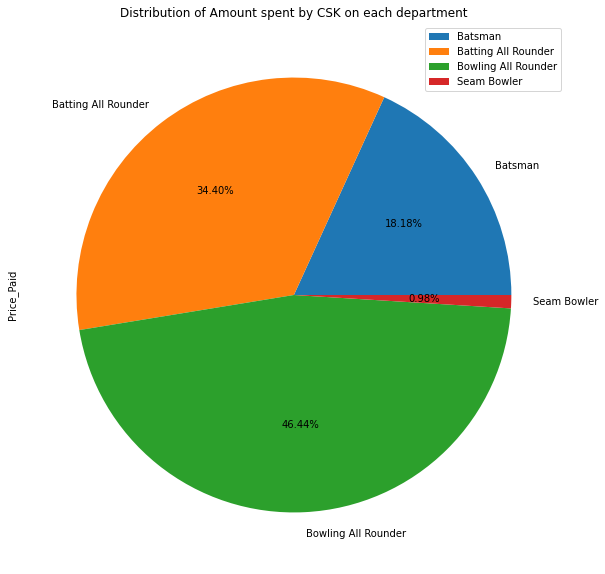

In [25]:
print("Visualization of distribution of Amount spent by CSK on each department: ")
print()
csk.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(15,10), title="Distribution of Amount spent by CSK on each department").legend(loc='upper right');

In [26]:
print("No. of IPL Experienced and inexperienced Players bought by Chennai Super Kings: ")
print("Experienced Players:     ",csk[pd.notnull(csk['Previous_IPL_Teams'])].shape[0])
print("Inexperienced Players:   ",csk[pd.isnull(csk['Previous_IPL_Teams'])].shape[0])

No. of IPL Experienced and inexperienced Players bought by Chennai Super Kings: 
Experienced Players:      4
Inexperienced Players:    3


In [27]:
print("No. of Internationally Experienced and inexperienced  Players bought by Chennai Super Kings: ")
print("Experienced Players:     ",csk[csk['Capped_or_Uncapped']=='Capped'].shape[0])
print("Inexperienced Players:   ",csk[csk['Capped_or_Uncapped']=='Uncapped'].shape[0])

No. of Internationally Experienced and inexperienced  Players bought by Chennai Super Kings: 
Experienced Players:      3
Inexperienced Players:    4


In [28]:
print("No. of players bought at")
print("Base Price:           ",csk[csk['Price_Paid']==csk['Base_Price']].shape[0])
print("More than Base Price: ",csk[csk['Price_Paid']!=csk['Base_Price']].shape[0])

No. of players bought at
Base Price:            4
More than Base Price:  3


## Royal Challengers Bangalore (RCB)

### Listing out players bought by RCB

In [29]:
rcb=data.groupby('Bought_by').get_group('RCB')
rcb

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
9,Dan Christian,75,480,Sold,RCB,"RCB, RPS, DC, SRH",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
12,Glenn Maxwell,200,1425,Sold,RCB,"PBKS, MI, DC",Australia,Batting All Rounder,Right,Right Offbreak,Middle,Capped
24,Kyle Jamieson,75,1500,Sold,RCB,NaN,New Zealand,Seam Bowler,NaN,Right Fast Medium,NaN,Capped
30,Mohammed Azharuddeen,20,20,Sold,RCB,NaN,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
37,Rajat Patidar,20,20,Sold,RCB,NaN,India,Batsman,Right,NaN,Top,Uncapped
40,Sachin Baby,20,20,Sold,RCB,"RR, RCB, SRH",India,Batsman,Left,NaN,Middle,Uncapped
47,Srikar Bharat,20,20,Sold,RCB,DC,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
49,Suyash Prabhudessai,20,20,Sold,RCB,NaN,India,Batting All Rounder,Right,Right Medium,Middle,Uncapped
57,Daniel Sams,0,30,Transfer,RCB,DC,Australia,All Rounder,Right,Left Fast Medium,Middle,Capped
58,Harshal Patel,0,20,Transfer,RCB,"DC, RCB",India,Seam Bowler,NaN,Right Medium,NaN,Uncapped


### Visualization of amount at which the players have been bought

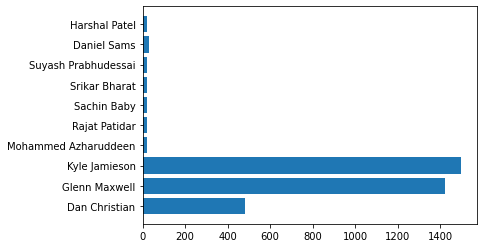

In [30]:
x=list(rcb['Player_Name']);
y=list(rcb['Price_Paid']);
plt.barh(x,y);

### List of Batsmen bought by RCB

In [31]:
rcb_bats=rcb[rcb['Role'].str.contains('Batsman')]
rcb_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
30,Mohammed Azharuddeen,20,20,Sold,RCB,NaN,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
37,Rajat Patidar,20,20,Sold,RCB,NaN,India,Batsman,Right,NaN,Top,Uncapped
40,Sachin Baby,20,20,Sold,RCB,"RR, RCB, SRH",India,Batsman,Left,NaN,Middle,Uncapped
47,Srikar Bharat,20,20,Sold,RCB,DC,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped


### List of Bowlers bought by RCB

In [32]:
rcb_bowl=rcb[rcb['Role'].str.contains('Bowler')]
rcb_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
24,Kyle Jamieson,75,1500,Sold,RCB,NaN,New Zealand,Seam Bowler,NaN,Right Fast Medium,NaN,Capped
58,Harshal Patel,0,20,Transfer,RCB,"DC, RCB",India,Seam Bowler,NaN,Right Medium,NaN,Uncapped


### List of All Rounders bought by RCB

In [33]:
rcb_all=rcb[rcb['Role'].str.contains('All Rounder')]
rcb_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
9,Dan Christian,75,480,Sold,RCB,"RCB, RPS, DC, SRH",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
12,Glenn Maxwell,200,1425,Sold,RCB,"PBKS, MI, DC",Australia,Batting All Rounder,Right,Right Offbreak,Middle,Capped
49,Suyash Prabhudessai,20,20,Sold,RCB,NaN,India,Batting All Rounder,Right,Right Medium,Middle,Uncapped
57,Daniel Sams,0,30,Transfer,RCB,DC,Australia,All Rounder,Right,Left Fast Medium,Middle,Capped


## TEAM ANALYSIS - ROYAL CHALLENGERS BANGALORE

In [34]:
print("Total amount spent during auction: ",(rcb['Price_Paid'].sum())/100," crores")

Total amount spent during auction:  35.55  crores


In [35]:
print("Highest bid by Royal Challengers Bangalore: ")
print()
formpri(rcb[rcb['Price_Paid']==rcb['Price_Paid'].max()])

Highest bid by Royal Challengers Bangalore: 

Player Name:              Kyle Jamieson
Country:                  New Zealand
Bought for (in crores):   15.0
Role:                     Seam Bowler


In [36]:
print("Highest Indian bid by Royal Challengers Bangalore: ")
print()
rcb[rcb['Price_Paid']==rcb[rcb['Country']=='India']['Price_Paid'].max()]

Highest Indian bid by Royal Challengers Bangalore: 



,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
30,Mohammed Azharuddeen,20,20,Sold,RCB,NaN,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
37,Rajat Patidar,20,20,Sold,RCB,NaN,India,Batsman,Right,NaN,Top,Uncapped
40,Sachin Baby,20,20,Sold,RCB,"RR, RCB, SRH",India,Batsman,Left,NaN,Middle,Uncapped
47,Srikar Bharat,20,20,Sold,RCB,DC,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
49,Suyash Prabhudessai,20,20,Sold,RCB,NaN,India,Batting All Rounder,Right,Right Medium,Middle,Uncapped
58,Harshal Patel,0,20,Transfer,RCB,"DC, RCB",India,Seam Bowler,NaN,Right Medium,NaN,Uncapped


In [37]:
print("Highest Foreign bid by Royal Challengers Bangalore: ")
print()
formpri(rcb[rcb['Price_Paid']==rcb[rcb['Country']!='India']['Price_Paid'].max()])

Highest Foreign bid by Royal Challengers Bangalore: 

Player Name:              Kyle Jamieson
Country:                  New Zealand
Bought for (in crores):   15.0
Role:                     Seam Bowler


In [38]:
print("Amount Spent on each Department: ")
print()
print((rcb.groupby('Role')['Price_Paid'].sum()/100).to_string())

Amount Spent on each Department: 

Role
All Rounder               5.10
Batsman                   0.40
Batting All Rounder      14.45
Seam Bowler              15.20
Wicket Keeper Batsman     0.40


In [39]:
print("Highest batsman bid by Royal Challengers Bangalore: ")
print()
rcb_bats[rcb_bats['Price_Paid']==rcb_bats['Price_Paid'].max()]

Highest batsman bid by Royal Challengers Bangalore: 



,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
30,Mohammed Azharuddeen,20,20,Sold,RCB,NaN,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
37,Rajat Patidar,20,20,Sold,RCB,NaN,India,Batsman,Right,NaN,Top,Uncapped
40,Sachin Baby,20,20,Sold,RCB,"RR, RCB, SRH",India,Batsman,Left,NaN,Middle,Uncapped
47,Srikar Bharat,20,20,Sold,RCB,DC,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped


In [40]:
print("Highest bowler bid by Royal Challengers Bangalore: ")
print()
formpri(rcb_bowl[rcb_bowl['Price_Paid']==rcb_bowl['Price_Paid'].max()])

Highest bowler bid by Royal Challengers Bangalore: 

Player Name:              Kyle Jamieson
Country:                  New Zealand
Bought for (in crores):   15.0
Role:                     Seam Bowler


In [41]:
print("Highest all rounder bid by Royal Challengers Bangalore: ")
print()
formpri(rcb_all[rcb_all['Price_Paid']==rcb_all['Price_Paid'].max()])

Highest all rounder bid by Royal Challengers Bangalore: 

Player Name:              Glenn Maxwell
Country:                  Australia
Bought for (in crores):   14.25
Role:                     Batting All Rounder


In [42]:
print("Average amount spent on each department: ")
print()
print((rcb.groupby('Role')['Price_Paid'].mean()/100).to_string())

Average amount spent on each department: 

Role
All Rounder              2.550
Batsman                  0.200
Batting All Rounder      7.225
Seam Bowler              7.600
Wicket Keeper Batsman    0.200


In [43]:
print("Highest capped bid by Royal Challengers Bangalore: ")
print()
formpri(rcb[rcb['Price_Paid']==rcb[rcb['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()])

Highest capped bid by Royal Challengers Bangalore: 

Player Name:              Kyle Jamieson
Country:                  New Zealand
Bought for (in crores):   15.0
Role:                     Seam Bowler


In [44]:
print("Highest uncapped bid by Royal Challengers Bangalore: ")
print()
rcb[rcb['Price_Paid']==rcb[rcb['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()]

Highest uncapped bid by Royal Challengers Bangalore: 



,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
30,Mohammed Azharuddeen,20,20,Sold,RCB,NaN,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
37,Rajat Patidar,20,20,Sold,RCB,NaN,India,Batsman,Right,NaN,Top,Uncapped
40,Sachin Baby,20,20,Sold,RCB,"RR, RCB, SRH",India,Batsman,Left,NaN,Middle,Uncapped
47,Srikar Bharat,20,20,Sold,RCB,DC,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
49,Suyash Prabhudessai,20,20,Sold,RCB,NaN,India,Batting All Rounder,Right,Right Medium,Middle,Uncapped
58,Harshal Patel,0,20,Transfer,RCB,"DC, RCB",India,Seam Bowler,NaN,Right Medium,NaN,Uncapped


Visualization of distribution of Amount spent by RCB on each department: 



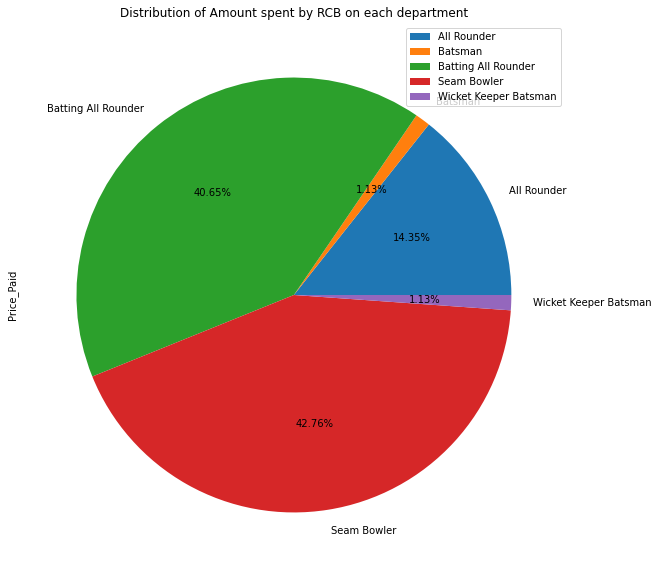

In [45]:
print("Visualization of distribution of Amount spent by RCB on each department: ")
print()
rcb.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(15,10), title="Distribution of Amount spent by RCB on each department").legend(loc='upper right');

In [46]:
print("No. of IPL Experienced and inexperienced Players bought by Royal Challengers Bangalore: ")
print("Experienced Players:     ",rcb[pd.notnull(rcb['Previous_IPL_Teams'])].shape[0])
print("Inexperienced Players:   ",rcb[pd.isnull(rcb['Previous_IPL_Teams'])].shape[0])

No. of IPL Experienced and inexperienced Players bought by Royal Challengers Bangalore: 
Experienced Players:      6
Inexperienced Players:    4


In [47]:
print("No. of Internationally Experienced and inexperienced  Players bought by Royal Challengers Bangalore: ")
print("Experienced Players:     ",rcb[rcb['Capped_or_Uncapped']=='Capped'].shape[0])
print("Inexperienced Players:   ",rcb[rcb['Capped_or_Uncapped']=='Uncapped'].shape[0])

No. of Internationally Experienced and inexperienced  Players bought by Royal Challengers Bangalore: 
Experienced Players:      4
Inexperienced Players:    6


In [48]:
print("No. of players bought at")
print("Base Price:           ",rcb[rcb['Price_Paid']==rcb['Base_Price']].shape[0])
print("More than Base Price: ",rcb[rcb['Price_Paid']!=rcb['Base_Price']].shape[0])

No. of players bought at
Base Price:            5
More than Base Price:  5


## Mumbai Indians (MI)

 ### Listing out players bought by MI

In [49]:
mi=data.groupby('Bought_by').get_group('MI')
mi

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
0,Adam Milne,50,320,Sold,MI,RCB,New Zealand,Seam Bowler,NaN,Right Fast,NaN,Capped
2,Arjun Tendulkar,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
17,James Neesham,50,50,Sold,MI,"DC, PBKS, KKR",New Zealand,Batting All Rounder,Left,Right Medium,Middle,Capped
28,Marco Jansen,20,20,Sold,MI,NaN,South Africa,Bowling All Rounder,Right,Left Fast,Lower,Uncapped
34,Nathan Coulter-Nile,150,500,Sold,MI,"MI, DC, KKR, RCB",Australia,Bowling All Rounder,Right,Right Fast,Lower,Capped
36,Piyush Chawla,50,240,Sold,MI,"KKR, PBKS, CSK",India,Bowling All Rounder,Left,Right Legbreak,Lower,Capped
56,Yudhvir Charak,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Right Medium Fast,NaN,Uncapped


### Visualization of amount at which the players have been bought

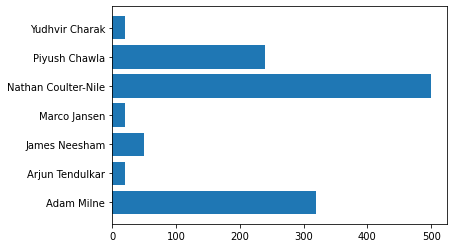

In [50]:
x=list(mi['Player_Name']);
y=list(mi['Price_Paid']);
plt.barh(x,y);

### List of Batsmen bought by MI

In [51]:
mi_bats=mi[mi['Role'].str.contains('Batsman')]
mi_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped


### List of Bowlers bought by MI

In [52]:
mi_bowl=mi[mi['Role'].str.contains('Bowler')]
mi_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
0,Adam Milne,50,320,Sold,MI,RCB,New Zealand,Seam Bowler,NaN,Right Fast,NaN,Capped
2,Arjun Tendulkar,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
56,Yudhvir Charak,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Right Medium Fast,NaN,Uncapped


### List of All Rounders bought by MI

In [53]:
mi_all=mi[mi['Role'].str.contains('All Rounder')]
mi_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
17,James Neesham,50,50,Sold,MI,"DC, PBKS, KKR",New Zealand,Batting All Rounder,Left,Right Medium,Middle,Capped
28,Marco Jansen,20,20,Sold,MI,NaN,South Africa,Bowling All Rounder,Right,Left Fast,Lower,Uncapped
34,Nathan Coulter-Nile,150,500,Sold,MI,"MI, DC, KKR, RCB",Australia,Bowling All Rounder,Right,Right Fast,Lower,Capped
36,Piyush Chawla,50,240,Sold,MI,"KKR, PBKS, CSK",India,Bowling All Rounder,Left,Right Legbreak,Lower,Capped


## TEAM ANALYSIS - MUMBAI INDIANS

In [54]:
print("Total amount spent during auction: ",(mi['Price_Paid'].sum())/100," crores")

Total amount spent during auction:  11.7  crores


In [55]:
print("Highest bid by Mumbai Indians: ")
print()
formpri(mi[mi['Price_Paid']==mi['Price_Paid'].max()])

Highest bid by Mumbai Indians: 

Player Name:              Nathan Coulter-Nile
Country:                  Australia
Bought for (in crores):   5.0
Role:                     Bowling All Rounder


In [56]:
print("Highest Indian bid by Mumbai Indians: ")
print()
formpri(mi[mi['Price_Paid']==mi[mi['Country']=='India']['Price_Paid'].max()])

Highest Indian bid by Mumbai Indians: 

Player Name:              Piyush Chawla
Country:                  India
Bought for (in crores):   2.4
Role:                     Bowling All Rounder


In [57]:
print("Highest Foreign bid by Mumbai Indians: ")
print()
formpri(mi[mi['Price_Paid']==mi[mi['Country']!='India']['Price_Paid'].max()])

Highest Foreign bid by Mumbai Indians: 

Player Name:              Nathan Coulter-Nile
Country:                  Australia
Bought for (in crores):   5.0
Role:                     Bowling All Rounder


In [58]:
print("Amount Spent on each Department: ")
print()
print((mi.groupby('Role')['Price_Paid'].sum()/100).to_string())

Amount Spent on each Department: 

Role
Batting All Rounder    0.5
Bowling All Rounder    7.6
Seam Bowler            3.6


In [59]:
print("Highest bowler bid by Mumbai Indians: ")
print()
formpri(mi_bowl[mi_bowl['Price_Paid']==mi_bowl['Price_Paid'].max()])

Highest bowler bid by Mumbai Indians: 

Player Name:              Adam Milne
Country:                  New Zealand
Bought for (in crores):   3.2
Role:                     Seam Bowler


In [60]:
print("Highest all rounder bid by Mumbai Indians: ")
print()
formpri(mi_all[mi_all['Price_Paid']==mi_all['Price_Paid'].max()])

Highest all rounder bid by Mumbai Indians: 

Player Name:              Nathan Coulter-Nile
Country:                  Australia
Bought for (in crores):   5.0
Role:                     Bowling All Rounder


In [61]:
print("Average amount spent on each department: ")
print()
print((mi.groupby('Role')['Price_Paid'].mean()/100).to_string())

Average amount spent on each department: 

Role
Batting All Rounder    0.500000
Bowling All Rounder    2.533333
Seam Bowler            1.200000


In [62]:
print("Highest capped bid by Mumbai Indians: ")
print()
formpri(mi[mi['Price_Paid']==mi[mi['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()])

Highest capped bid by Mumbai Indians: 

Player Name:              Nathan Coulter-Nile
Country:                  Australia
Bought for (in crores):   5.0
Role:                     Bowling All Rounder


In [63]:
print("Highest uncapped bid by Mumbai Indians: ")
print()
mi[mi['Price_Paid']==mi[mi['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()]

Highest uncapped bid by Mumbai Indians: 



,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
2,Arjun Tendulkar,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
28,Marco Jansen,20,20,Sold,MI,NaN,South Africa,Bowling All Rounder,Right,Left Fast,Lower,Uncapped
56,Yudhvir Charak,20,20,Sold,MI,NaN,India,Seam Bowler,NaN,Right Medium Fast,NaN,Uncapped


Visualization of distribution of Amount spent by MI on each department: 



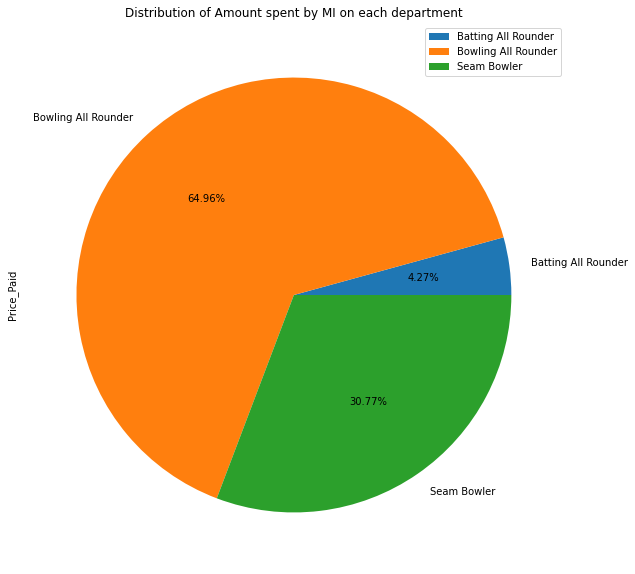

In [64]:
print("Visualization of distribution of Amount spent by MI on each department: ")
print()
mi.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(15,10), title="Distribution of Amount spent by MI on each department").legend(loc='upper right');

In [65]:
print("No. of IPL Experienced and inexperienced Players bought by Mumbai Indians: ")
print("Experienced Players:     ",mi[pd.notnull(mi['Previous_IPL_Teams'])].shape[0])
print("Inexperienced Players:   ",mi[pd.isnull(mi['Previous_IPL_Teams'])].shape[0])

No. of IPL Experienced and inexperienced Players bought by Mumbai Indians: 
Experienced Players:      4
Inexperienced Players:    3


In [66]:
print("No. of Internationally Experienced and inexperienced  Players bought by Mumbai Indians: ")
print("Experienced Players:     ",mi[mi['Capped_or_Uncapped']=='Capped'].shape[0])
print("Inexperienced Players:   ",mi[mi['Capped_or_Uncapped']=='Uncapped'].shape[0])

No. of Internationally Experienced and inexperienced  Players bought by Mumbai Indians: 
Experienced Players:      4
Inexperienced Players:    3


In [67]:
print("No. of players bought at")
print("Base Price:           ",mi[mi['Price_Paid']==mi['Base_Price']].shape[0])
print("More than Base Price: ",mi[mi['Price_Paid']!=mi['Base_Price']].shape[0])

No. of players bought at
Base Price:            4
More than Base Price:  3


## Delhi Capitals (DC)

### Listing out players bought by DC

In [68]:
dc=data.groupby('Bought_by').get_group('DC')
dc

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
26,Lukman Meriwala,20,20,Sold,DC,NaN,India,Seam Bowler,NaN,Left Fast Medium,NaN,Uncapped
27,Manimaran Siddharth,20,20,Sold,DC,NaN,India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped
39,Ripal Patel,20,20,Sold,DC,NaN,India,Batting All Rounder,Right,Right Medium Fast,Middle,Uncapped
41,Sam Billings,200,200,Sold,DC,"DC, CSK",England,Wicket Keeper Batsman,Right,NaN,Middle,Capped
48,Steven Smith,200,200,Sold,DC,"RCB, KTK, PWI, RR, RPS",Australia,Batsman,Right,NaN,Middle,Capped
50,Tom Curran,150,525,Sold,DC,"KKR, RR",England,Bowling All Rounder,Right,Right Fast Medium,Lower,Capped
51,Umesh Yadav,100,100,Sold,DC,"RCB, KKR, DC",India,Seam Bowler,NaN,Right Fast,NaN,Capped
55,Vishnu Vinod,20,20,Sold,DC,RCB,India,Wicket Keeper Batsman,Right,NaN,Middle,Uncapped


### Visualization of amount at which the players have been bought

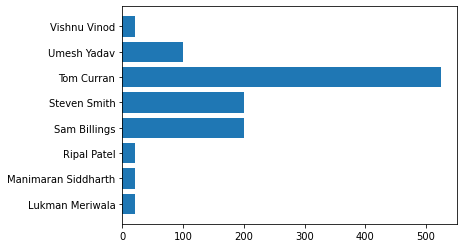

In [69]:
x=list(dc['Player_Name']);
y=list(dc['Price_Paid']);
plt.barh(x,y);

### List of Batsmen bought by DC

In [70]:
dc_bats=dc[dc['Role'].str.contains('Batsman')]
dc_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
41,Sam Billings,200,200,Sold,DC,"DC, CSK",England,Wicket Keeper Batsman,Right,NaN,Middle,Capped
48,Steven Smith,200,200,Sold,DC,"RCB, KTK, PWI, RR, RPS",Australia,Batsman,Right,NaN,Middle,Capped
55,Vishnu Vinod,20,20,Sold,DC,RCB,India,Wicket Keeper Batsman,Right,NaN,Middle,Uncapped


### List of Bowlers bought by DC

In [71]:
dc_bowl=dc[dc['Role'].str.contains('Bowler')]
dc_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
26,Lukman Meriwala,20,20,Sold,DC,NaN,India,Seam Bowler,NaN,Left Fast Medium,NaN,Uncapped
27,Manimaran Siddharth,20,20,Sold,DC,NaN,India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped
51,Umesh Yadav,100,100,Sold,DC,"RCB, KKR, DC",India,Seam Bowler,NaN,Right Fast,NaN,Capped


### List of All Rounders bought by DC

In [72]:
dc_all=dc[dc['Role'].str.contains('All Rounder')]
dc_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
39,Ripal Patel,20,20,Sold,DC,NaN,India,Batting All Rounder,Right,Right Medium Fast,Middle,Uncapped
50,Tom Curran,150,525,Sold,DC,"KKR, RR",England,Bowling All Rounder,Right,Right Fast Medium,Lower,Capped


## TEAM ANALYSIS - DELHI CAPITALS

In [73]:
print("Total amount spent during auction: ",(dc['Price_Paid'].sum())/100," crores")

Total amount spent during auction:  11.05  crores


In [74]:
print("Highest bid by Delhi Capitals: ")
print()
formpri(dc[dc['Price_Paid']==dc['Price_Paid'].max()])

Highest bid by Delhi Capitals: 

Player Name:              Tom Curran
Country:                  England
Bought for (in crores):   5.25
Role:                     Bowling All Rounder


In [75]:
print("Highest Indian bid by Delhi Capitals: ")
print()
formpri(dc[dc['Price_Paid']==dc[dc['Country']=='India']['Price_Paid'].max()])

Highest Indian bid by Delhi Capitals: 

Player Name:              Umesh Yadav
Country:                  India
Bought for (in crores):   1.0
Role:                     Seam Bowler


In [76]:
print("Highest Foreign bid by Delhi Capitals: ")
print()
formpri(dc[dc['Price_Paid']==dc[dc['Country']!='India']['Price_Paid'].max()])

Highest Foreign bid by Delhi Capitals: 

Player Name:              Tom Curran
Country:                  England
Bought for (in crores):   5.25
Role:                     Bowling All Rounder


In [77]:
print("Amount Spent on each Department: ")
print()
print((dc.groupby('Role')['Price_Paid'].sum()/100).to_string())

Amount Spent on each Department: 

Role
Batsman                  2.00
Batting All Rounder      0.20
Bowling All Rounder      5.25
Seam Bowler              1.20
Spin Bowler              0.20
Wicket Keeper Batsman    2.20


In [78]:
print("Highest batsman bid by Delhi Capitals: ")
print()
dc_bats[dc_bats['Price_Paid']==dc_bats['Price_Paid'].max()]

Highest batsman bid by Delhi Capitals: 



,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
41,Sam Billings,200,200,Sold,DC,"DC, CSK",England,Wicket Keeper Batsman,Right,NaN,Middle,Capped
48,Steven Smith,200,200,Sold,DC,"RCB, KTK, PWI, RR, RPS",Australia,Batsman,Right,NaN,Middle,Capped


In [79]:
print("Highest bowler bid by Delhi Capitals: ")
print()
formpri(dc_bowl[dc_bowl['Price_Paid']==dc_bowl['Price_Paid'].max()])

Highest bowler bid by Delhi Capitals: 

Player Name:              Umesh Yadav
Country:                  India
Bought for (in crores):   1.0
Role:                     Seam Bowler


In [80]:
print("Highest all rounder bid by Delhi Capitals: ")
print()
formpri(dc_all[dc_all['Price_Paid']==dc_all['Price_Paid'].max()])

Highest all rounder bid by Delhi Capitals: 

Player Name:              Tom Curran
Country:                  England
Bought for (in crores):   5.25
Role:                     Bowling All Rounder


In [81]:
print("Average amount spent on each department: ")
print()
print((dc.groupby('Role')['Price_Paid'].mean()/100).to_string())

Average amount spent on each department: 

Role
Batsman                  2.00
Batting All Rounder      0.20
Bowling All Rounder      5.25
Seam Bowler              0.60
Spin Bowler              0.20
Wicket Keeper Batsman    1.10


In [82]:
print("Highest capped bid by Delhi Capitals: ")
print()
formpri(dc[dc['Price_Paid']==dc[dc['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()])

Highest capped bid by Delhi Capitals: 

Player Name:              Tom Curran
Country:                  England
Bought for (in crores):   5.25
Role:                     Bowling All Rounder


In [83]:
print("Highest uncapped bid by Delhi Capitals: ")
print()
dc[dc['Price_Paid']==dc[dc['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()]

Highest uncapped bid by Delhi Capitals: 



,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
26,Lukman Meriwala,20,20,Sold,DC,NaN,India,Seam Bowler,NaN,Left Fast Medium,NaN,Uncapped
27,Manimaran Siddharth,20,20,Sold,DC,NaN,India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped
39,Ripal Patel,20,20,Sold,DC,NaN,India,Batting All Rounder,Right,Right Medium Fast,Middle,Uncapped
55,Vishnu Vinod,20,20,Sold,DC,RCB,India,Wicket Keeper Batsman,Right,NaN,Middle,Uncapped


Visualization of distribution of Amount spent by DC on each department: 



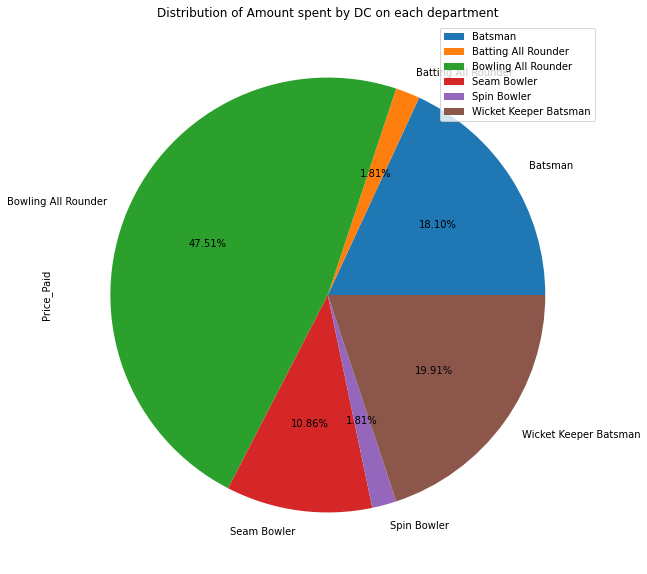

In [84]:
print("Visualization of distribution of Amount spent by DC on each department: ")
print()
dc.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(15,10), title="Distribution of Amount spent by DC on each department").legend(loc='upper right');

In [85]:
print("No. of IPL Experienced and inexperienced Players bought by Delhi Capitals: ")
print("Experienced Players:     ",dc[pd.notnull(dc['Previous_IPL_Teams'])].shape[0])
print("Inexperienced Players:   ",dc[pd.isnull(dc['Previous_IPL_Teams'])].shape[0])

No. of IPL Experienced and inexperienced Players bought by Delhi Capitals: 
Experienced Players:      5
Inexperienced Players:    3


In [86]:
print("No. of Internationally Experienced and inexperienced  Players bought by Delhi Capitals: ")
print("Experienced Players:     ",dc[dc['Capped_or_Uncapped']=='Capped'].shape[0])
print("Inexperienced Players:   ",dc[dc['Capped_or_Uncapped']=='Uncapped'].shape[0])

No. of Internationally Experienced and inexperienced  Players bought by Delhi Capitals: 
Experienced Players:      4
Inexperienced Players:    4


In [87]:
print("No. of players bought at")
print("Base Price:           ",dc[dc['Price_Paid']==dc['Base_Price']].shape[0])
print("More than Base Price: ",dc[dc['Price_Paid']!=dc['Base_Price']].shape[0])

No. of players bought at
Base Price:            7
More than Base Price:  1


## Sunrisers Hyderabad (SRH)

### Listing out players bought by SRH

In [88]:
srh=data.groupby('Bought_by').get_group('SRH')
srh

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
15,Jagadeesha Suchith,20,30,Sold,SRH,"MI, DC, PBKS",India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped
20,Kedar Jadhav,200,200,Sold,SRH,"DC, CSK, RCB, KTK",India,Batting All Rounder,Right,Right Offbreak,Middle,Capped
32,Mujeeb Ur Rahman,150,150,Sold,SRH,PBKS,Afghanistan,Spin Bowler,NaN,Right Offbreak,NaN,Capped


### Visualization of amount at which the players have been bought

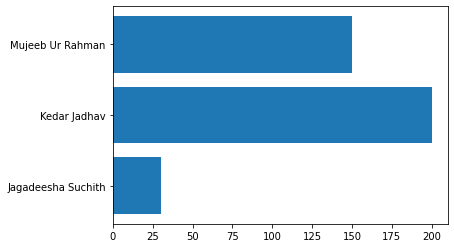

In [89]:
x=list(srh['Player_Name']);
y=list(srh['Price_Paid']);
plt.barh(x,y);

### List of Batsmen bought by SRH

In [90]:
srh_bats=srh[srh['Role'].str.contains('Batsman')]
srh_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped


### List of Bowlers bought by SRH

In [91]:
srh_bowl=srh[srh['Role'].str.contains('Bowler')]
srh_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
15,Jagadeesha Suchith,20,30,Sold,SRH,"MI, DC, PBKS",India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Uncapped
32,Mujeeb Ur Rahman,150,150,Sold,SRH,PBKS,Afghanistan,Spin Bowler,NaN,Right Offbreak,NaN,Capped


### List of All Rounders bought by SRH

In [92]:
srh_all=srh[srh['Role'].str.contains('All Rounder')]
srh_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
20,Kedar Jadhav,200,200,Sold,SRH,"DC, CSK, RCB, KTK",India,Batting All Rounder,Right,Right Offbreak,Middle,Capped


## TEAM ANALYSIS - SUNRISERS HYDERABAD

In [93]:
print("Total amount spent during auction: ",(srh['Price_Paid'].sum())/100," crores")

Total amount spent during auction:  3.8  crores


In [94]:
print("Highest bid by Sunrisers Hyderabad: ")
print()
formpri(srh[srh['Price_Paid']==srh['Price_Paid'].max()])

Highest bid by Sunrisers Hyderabad: 

Player Name:              Kedar Jadhav
Country:                  India
Bought for (in crores):   2.0
Role:                     Batting All Rounder


In [95]:
print("Highest Indian bid by Sunrisers Hyderabad: ")
print()
formpri(srh[srh['Price_Paid']==srh[srh['Country']=='India']['Price_Paid'].max()])

Highest Indian bid by Sunrisers Hyderabad: 

Player Name:              Kedar Jadhav
Country:                  India
Bought for (in crores):   2.0
Role:                     Batting All Rounder


In [96]:
print("Highest Foreign bid by Sunrisers Hyderabad: ")
print()
formpri(srh[srh['Price_Paid']==srh[srh['Country']!='India']['Price_Paid'].max()])

Highest Foreign bid by Sunrisers Hyderabad: 

Player Name:              Mujeeb Ur Rahman
Country:                  Afghanistan
Bought for (in crores):   1.5
Role:                     Spin Bowler


In [97]:
print("Amount Spent on each Department: ")
print()
print((srh.groupby('Role')['Price_Paid'].sum()/100).to_string())

Amount Spent on each Department: 

Role
Batting All Rounder    2.0
Spin Bowler            1.8


In [98]:
print("Highest bowler bid by Sunrisers Hyderabad: ")
print()
formpri(srh_bowl[srh_bowl['Price_Paid']==srh_bowl['Price_Paid'].max()])

Highest bowler bid by Sunrisers Hyderabad: 

Player Name:              Mujeeb Ur Rahman
Country:                  Afghanistan
Bought for (in crores):   1.5
Role:                     Spin Bowler


In [99]:
print("Highest all rounder bid by Sunrisers Hyderabad: ")
print()
formpri(srh_all[srh_all['Price_Paid']==srh_all['Price_Paid'].max()])

Highest all rounder bid by Sunrisers Hyderabad: 

Player Name:              Kedar Jadhav
Country:                  India
Bought for (in crores):   2.0
Role:                     Batting All Rounder


In [100]:
print("Average amount spent on each department: ")
print()
print((srh.groupby('Role')['Price_Paid'].mean()/100).to_string())

Average amount spent on each department: 

Role
Batting All Rounder    2.0
Spin Bowler            0.9


In [101]:
print("Highest capped bid by Sunrisers Hyderabad: ")
print()
formpri(srh[srh['Price_Paid']==srh[srh['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()])

Highest capped bid by Sunrisers Hyderabad: 

Player Name:              Kedar Jadhav
Country:                  India
Bought for (in crores):   2.0
Role:                     Batting All Rounder


In [102]:
print("Highest uncapped bid by Sunrisers Hyderabad: ")
print()
formpri(srh[srh['Price_Paid']==srh[srh['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()])

Highest uncapped bid by Sunrisers Hyderabad: 

Player Name:              Jagadeesha Suchith
Country:                  India
Bought for (in crores):   0.3
Role:                     Spin Bowler


Visualization of distribution of Amount spent by SRH on each department: 



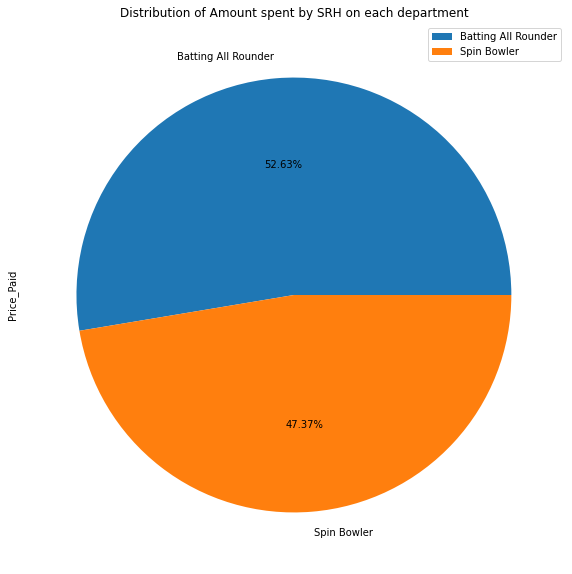

In [103]:
print("Visualization of distribution of Amount spent by SRH on each department: ")
print()
srh.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(15,10), title="Distribution of Amount spent by SRH on each department").legend(loc='upper right');

In [104]:
print("No. of IPL Experienced and inexperienced Players bought by Sunrisers Hyderabad: ")
print("Experienced Players:     ",srh[pd.notnull(srh['Previous_IPL_Teams'])].shape[0])
print("Inexperienced Players:   ",srh[pd.isnull(srh['Previous_IPL_Teams'])].shape[0])

No. of IPL Experienced and inexperienced Players bought by Sunrisers Hyderabad: 
Experienced Players:      3
Inexperienced Players:    0


In [105]:
print("No. of Internationally Experienced and inexperienced  Players bought by Chennai Super Kings: ")
print("Experienced Players:     ",srh[srh['Capped_or_Uncapped']=='Capped'].shape[0])
print("Inexperienced Players:   ",srh[srh['Capped_or_Uncapped']=='Uncapped'].shape[0])

No. of Internationally Experienced and inexperienced  Players bought by Chennai Super Kings: 
Experienced Players:      2
Inexperienced Players:    1


In [106]:
print("No. of players bought at")
print("Base Price:           ",srh[srh['Price_Paid']==srh['Base_Price']].shape[0])
print("More than Base Price: ",srh[srh['Price_Paid']!=srh['Base_Price']].shape[0])

No. of players bought at
Base Price:            2
More than Base Price:  1


## Rajasthan Royals (RR)

### Listing out players bought by RR

In [107]:
rr=data.groupby('Bought_by').get_group('RR')
rr

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
1,Akash Singh,20,20,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
6,Chetan Sakariya,20,120,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped
21,Kishan Cariappa,20,20,Sold,RR,"KKR, PBKS",India,Spin Bowler,NaN,Right Legbreak,NaN,Uncapped
23,Kuldip Yadav,20,20,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
25,Liam Livingstone,75,75,Sold,RR,RR,England,Batting All Rounder,Right,"Right Legbreak, Right Offbreak",Top,Capped
33,Mustaifur Rahman,100,100,Sold,RR,"MI, SRH",Bangladesh,Seam Bowler,NaN,Left Fast Medium,NaN,Capped
46,Shivam Dube,50,440,Sold,RR,RCB,India,All Rounder,Left,Right Medium,Middle,Capped


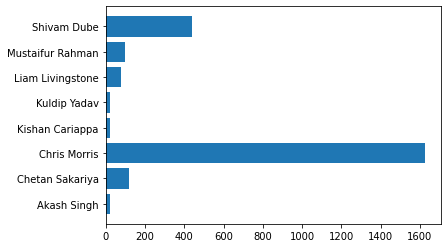

In [108]:
x=list(rr['Player_Name']);
y=list(rr['Price_Paid']);
plt.barh(x,y);

### List of Batsmen bought by RR

In [109]:
rr_bats=rr[rr['Role'].str.contains('Batsman')]
rr_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped


### List of Bowlers bought by RR

In [110]:
rr_bowl=rr[rr['Role'].str.contains('Bowler')]
rr_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
1,Akash Singh,20,20,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
6,Chetan Sakariya,20,120,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
21,Kishan Cariappa,20,20,Sold,RR,"KKR, PBKS",India,Spin Bowler,NaN,Right Legbreak,NaN,Uncapped
23,Kuldip Yadav,20,20,Sold,RR,NaN,India,Seam Bowler,NaN,Left Medium Fast,NaN,Uncapped
33,Mustaifur Rahman,100,100,Sold,RR,"MI, SRH",Bangladesh,Seam Bowler,NaN,Left Fast Medium,NaN,Capped


### List of All Rounders bought by RR

In [111]:
rr_all=rr[rr['Role'].str.contains('All Rounder')]
rr_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
8,Chris Morris,75,1625,Sold,RR,"CSK, RR, DC, RCB",South Africa,Bowling All Rounder,Right,Right Fast Medium,Middle,Capped
25,Liam Livingstone,75,75,Sold,RR,RR,England,Batting All Rounder,Right,"Right Legbreak, Right Offbreak",Top,Capped
46,Shivam Dube,50,440,Sold,RR,RCB,India,All Rounder,Left,Right Medium,Middle,Capped


## TEAM ANALYSIS - RAJASTHAN ROYALS

In [112]:
print("Total amount spent during auction: ",(rr['Price_Paid'].sum())/100," crores")

Total amount spent during auction:  24.2  crores


In [113]:
print("Highest bid by Rajasthan Royals: ")
print()
formpri(rr[rr['Price_Paid']==rr['Price_Paid'].max()])

Highest bid by Rajasthan Royals: 

Player Name:              Chris Morris
Country:                  South Africa
Bought for (in crores):   16.25
Role:                     Bowling All Rounder


In [114]:
print("Highest Indian bid by Rajasthan Royals: ")
print()
formpri(rr[rr['Price_Paid']==rr[rr['Country']=='India']['Price_Paid'].max()])

Highest Indian bid by Rajasthan Royals: 

Player Name:              Shivam Dube
Country:                  India
Bought for (in crores):   4.4
Role:                     All Rounder


In [115]:
print("Highest Foreign bid by Rajasthan Royals: ")
print()
formpri(rr[rr['Price_Paid']==rr[rr['Country']!='India']['Price_Paid'].max()])

Highest Foreign bid by Rajasthan Royals: 

Player Name:              Chris Morris
Country:                  South Africa
Bought for (in crores):   16.25
Role:                     Bowling All Rounder


In [116]:
print("Amount Spent on each Department: ")
print()
print((rr.groupby('Role')['Price_Paid'].sum()/100).to_string())

Amount Spent on each Department: 

Role
All Rounder             4.40
Batting All Rounder     0.75
Bowling All Rounder    16.25
Seam Bowler             2.60
Spin Bowler             0.20


In [117]:
print("Highest bowler bid by Rajasthan Royals: ")
print()
formpri(rr_bowl[rr_bowl['Price_Paid']==rr_bowl['Price_Paid'].max()])

Highest bowler bid by Rajasthan Royals: 

Player Name:              Chetan Sakariya
Country:                  India
Bought for (in crores):   1.2
Role:                     Seam Bowler


In [118]:
print("Highest all rounder bid by Rajasthan Royals: ")
print()
formpri(rr_all[rr_all['Price_Paid']==rr_all['Price_Paid'].max()])

Highest all rounder bid by Rajasthan Royals: 

Player Name:              Chris Morris
Country:                  South Africa
Bought for (in crores):   16.25
Role:                     Bowling All Rounder


In [119]:
print("Average amount spent on each department: ")
print()
print((rr.groupby('Role')['Price_Paid'].mean()/100).to_string())

Average amount spent on each department: 

Role
All Rounder             4.40
Batting All Rounder     0.75
Bowling All Rounder    16.25
Seam Bowler             0.65
Spin Bowler             0.20


In [120]:
print("Highest capped bid by Rajasthan Royals: ")
print()
formpri(rr[rr['Price_Paid']==rr[rr['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()])

Highest capped bid by Rajasthan Royals: 

Player Name:              Chris Morris
Country:                  South Africa
Bought for (in crores):   16.25
Role:                     Bowling All Rounder


In [121]:
print("Highest uncapped bid by Rajasthan Royals: ")
print()
formpri(rr[rr['Price_Paid']==rr[rr['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()])

Highest uncapped bid by Rajasthan Royals: 

Player Name:              Chetan Sakariya
Country:                  India
Bought for (in crores):   1.2
Role:                     Seam Bowler


Visualization of distribution of Amount spent by RR on each department: 



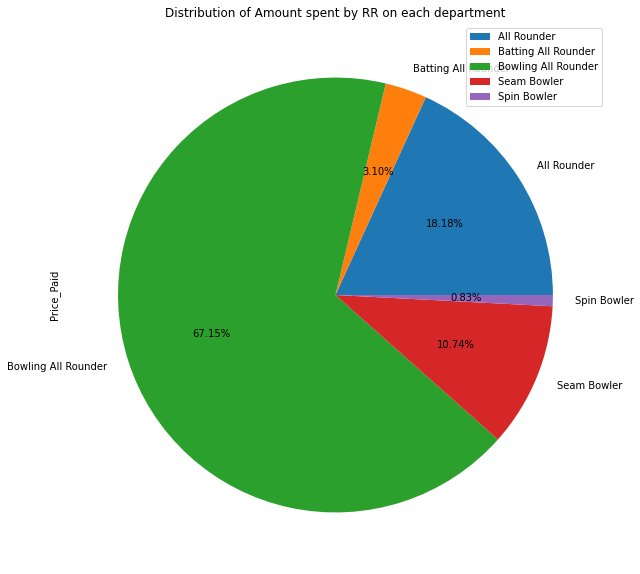

In [122]:
print("Visualization of distribution of Amount spent by RR on each department: ")
print()
rr.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(15,10), title="Distribution of Amount spent by RR on each department").legend(loc='upper right');

In [123]:
print("No. of IPL Experienced and inexperienced Players bought by Rajasthan Royals: ")
print("Experienced Players:     ",rr[pd.notnull(rr['Previous_IPL_Teams'])].shape[0])
print("Inexperienced Players:   ",rr[pd.isnull(rr['Previous_IPL_Teams'])].shape[0])

No. of IPL Experienced and inexperienced Players bought by Rajasthan Royals: 
Experienced Players:      5
Inexperienced Players:    3


In [124]:
print("No. of Internationally Experienced and inexperienced  Players bought by Rajasthan Royals: ")
print("Experienced Players:     ",rr[rr['Capped_or_Uncapped']=='Capped'].shape[0])
print("Inexperienced Players:   ",rr[rr['Capped_or_Uncapped']=='Uncapped'].shape[0])

No. of Internationally Experienced and inexperienced  Players bought by Rajasthan Royals: 
Experienced Players:      4
Inexperienced Players:    4


In [125]:
print("No. of players bought at")
print("Base Price:           ",rr[rr['Price_Paid']==rr['Base_Price']].shape[0])
print("More than Base Price: ",rr[rr['Price_Paid']!=rr['Base_Price']].shape[0])

No. of players bought at
Base Price:            5
More than Base Price:  3


## Punjab Kings (PBKS)

### Listing out players bought by PBKS

In [126]:
pbks=data.groupby('Bought_by').get_group('PBKS')
pbks

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
10,Dawid Malan,150,150,Sold,PBKS,NaN,England,Batsman,Left,NaN,Top,Capped
11,Fabian Allen,75,75,Sold,PBKS,SRH,West Indies,Bowling All Rounder,Right,Slow Left Orthodox,Middle,Capped
16,Jalaj Saxena,30,30,Sold,PBKS,"MI, DC, RCB",India,Batting All Rounder,Right,Right Offbreak,Top,Uncapped
18,Jhye Richardson,150,1400,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Capped
31,Moises Henriques,100,420,Sold,PBKS,"KKR, DC, RCB, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
38,Riley Meredith,40,800,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Uncapped
42,Saurabh Kumar,20,20,Sold,PBKS,RPS,India,Bowling All Rounder,Left,Slow Left Orthodox,Lower,Uncapped
43,Shahrukh Khan,20,525,Sold,PBKS,NaN,India,Batsman,Right,NaN,Middle,Uncapped
52,Utkarsh Singh,20,20,Sold,PBKS,NaN,India,All Rounder,Left,Right Offbreak,Top,Uncapped


### Visualization of amount at which the players have been bought

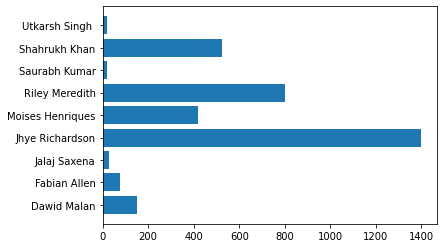

In [127]:
x=list(pbks['Player_Name']);
y=list(pbks['Price_Paid']);
plt.barh(x,y);

### List of Batsmen bought by PBKS

In [128]:
pbks_bats=pbks[pbks['Role'].str.contains('Batsman')]
pbks_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
10,Dawid Malan,150,150,Sold,PBKS,NaN,England,Batsman,Left,NaN,Top,Capped
43,Shahrukh Khan,20,525,Sold,PBKS,NaN,India,Batsman,Right,NaN,Middle,Uncapped


### List of Bowlers bought by PBKS

In [129]:
pbks_bowl=pbks[pbks['Role'].str.contains('Bowler')]
pbks_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
18,Jhye Richardson,150,1400,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Capped
38,Riley Meredith,40,800,Sold,PBKS,NaN,Australia,Seam Bowler,NaN,Right Fast,NaN,Uncapped


### List of All Rounders bought by PBKS

In [130]:
pbks_all=pbks[pbks['Role'].str.contains('All Rounder')]
pbks_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
11,Fabian Allen,75,75,Sold,PBKS,SRH,West Indies,Bowling All Rounder,Right,Slow Left Orthodox,Middle,Capped
16,Jalaj Saxena,30,30,Sold,PBKS,"MI, DC, RCB",India,Batting All Rounder,Right,Right Offbreak,Top,Uncapped
31,Moises Henriques,100,420,Sold,PBKS,"KKR, DC, RCB, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
42,Saurabh Kumar,20,20,Sold,PBKS,RPS,India,Bowling All Rounder,Left,Slow Left Orthodox,Lower,Uncapped
52,Utkarsh Singh,20,20,Sold,PBKS,NaN,India,All Rounder,Left,Right Offbreak,Top,Uncapped


### TEAM ANALYSIS - PUNJAB KINGS

In [131]:
print("Total amount spent during auction: ",(pbks['Price_Paid'].sum())/100," crores")

Total amount spent during auction:  34.4  crores


In [132]:
print("Highest bid by Punjab Kings: ")
print()
formpri(pbks[pbks['Price_Paid']==pbks['Price_Paid'].max()])

Highest bid by Punjab Kings: 

Player Name:              Jhye Richardson
Country:                  Australia
Bought for (in crores):   14.0
Role:                     Seam Bowler


In [133]:
print("Highest Indian bid by Punjab Kings: ")
print()
formpri(pbks[pbks['Price_Paid']==pbks[pbks['Country']=='India']['Price_Paid'].max()])

Highest Indian bid by Punjab Kings: 

Player Name:              Shahrukh Khan
Country:                  India
Bought for (in crores):   5.25
Role:                     Batsman


In [134]:
print("Highest Foreign bid by Punjab Kings: ")
print()
formpri(pbks[pbks['Price_Paid']==pbks[pbks['Country']!='India']['Price_Paid'].max()])

Highest Foreign bid by Punjab Kings: 

Player Name:              Jhye Richardson
Country:                  Australia
Bought for (in crores):   14.0
Role:                     Seam Bowler


In [135]:
print("Amount Spent on each Department: ")
print()
print((pbks.groupby('Role')['Price_Paid'].sum()/100).to_string())

Amount Spent on each Department: 

Role
All Rounder             4.40
Batsman                 6.75
Batting All Rounder     0.30
Bowling All Rounder     0.95
Seam Bowler            22.00


In [136]:
print("Highest batsman bid by Punjab Kings: ")
print()
formpri(pbks_bats[pbks_bats['Price_Paid']==pbks_bats['Price_Paid'].max()])

Highest batsman bid by Punjab Kings: 

Player Name:              Shahrukh Khan
Country:                  India
Bought for (in crores):   5.25
Role:                     Batsman


In [137]:
print("Highest bowler bid by Punjab Kings: ")
print()
formpri(pbks_bowl[pbks_bowl['Price_Paid']==pbks_bowl['Price_Paid'].max()])

Highest bowler bid by Punjab Kings: 

Player Name:              Jhye Richardson
Country:                  Australia
Bought for (in crores):   14.0
Role:                     Seam Bowler


In [138]:
print("Highest all rounder bid by Punjab Kings: ")
print()
formpri(pbks_all[pbks_all['Price_Paid']==pbks_all['Price_Paid'].max()])

Highest all rounder bid by Punjab Kings: 

Player Name:              Moises Henriques
Country:                  Australia
Bought for (in crores):   4.2
Role:                     All Rounder


In [139]:
print("Average amount spent on each department: ")
print()
print((pbks.groupby('Role')['Price_Paid'].mean()/100).to_string())

Average amount spent on each department: 

Role
All Rounder             2.200
Batsman                 3.375
Batting All Rounder     0.300
Bowling All Rounder     0.475
Seam Bowler            11.000


In [140]:
print("Highest capped bid by Punjab Kings: ")
print()
formpri(pbks[pbks['Price_Paid']==pbks[pbks['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()])

Highest capped bid by Punjab Kings: 

Player Name:              Jhye Richardson
Country:                  Australia
Bought for (in crores):   14.0
Role:                     Seam Bowler


In [141]:
print("Highest uncapped bid by Punjab Kings: ")
print()
formpri(pbks[pbks['Price_Paid']==pbks[pbks['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()])

Highest uncapped bid by Punjab Kings: 

Player Name:              Riley Meredith
Country:                  Australia
Bought for (in crores):   8.0
Role:                     Seam Bowler


Visualization of distribution of Amount spent by PBKS on each department: 



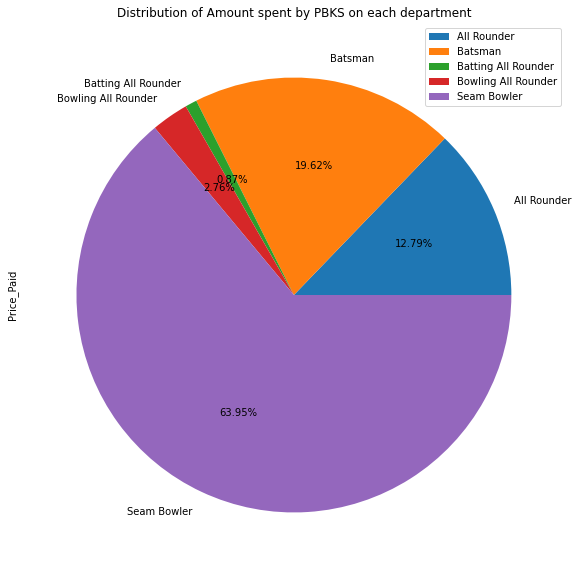

In [142]:
print("Visualization of distribution of Amount spent by PBKS on each department: ")
print()
pbks.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(15,10), title="Distribution of Amount spent by PBKS on each department").legend(loc='upper right');

In [143]:
print("No. of IPL Experienced and inexperienced Players bought by Punjab Kings: ")
print("Experienced Players:     ",pbks[pd.notnull(pbks['Previous_IPL_Teams'])].shape[0])
print("Inexperienced Players:   ",pbks[pd.isnull(pbks['Previous_IPL_Teams'])].shape[0])

No. of IPL Experienced and inexperienced Players bought by Punjab Kings: 
Experienced Players:      4
Inexperienced Players:    5


In [144]:
print("No. of Internationally Experienced and inexperienced  Players bought by Punjab Kings: ")
print("Experienced Players:     ",pbks[pbks['Capped_or_Uncapped']=='Capped'].shape[0])
print("Inexperienced Players:   ",pbks[pbks['Capped_or_Uncapped']=='Uncapped'].shape[0])

No. of Internationally Experienced and inexperienced  Players bought by Punjab Kings: 
Experienced Players:      4
Inexperienced Players:    5


In [145]:
print("No. of players bought at")
print("Base Price:           ",pbks[pbks['Price_Paid']==pbks['Base_Price']].shape[0])
print("More than Base Price: ",pbks[pbks['Price_Paid']!=pbks['Base_Price']].shape[0])

No. of players bought at
Base Price:            5
More than Base Price:  4


## Kolkata Knight Riders (KKR)

### Listing out players bought by KKR

In [146]:
kkr=data.groupby('Bought_by').get_group('KKR')
kkr

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
3,Ben Cutting,75,75,Sold,KKR,"RR, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
13,Harbhajan Singh,200,200,Sold,KKR,"CSK, MI",India,Spin Bowler,NaN,Right Offbreak,NaN,Capped
19,Karun Nair,50,50,Sold,KKR,"RCB, DC, PBKS, RR",India,Batsman,Right,NaN,Middle,Capped
35,Pawan Negi,50,50,Sold,KKR,"DC, CSK, RCB",India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Capped
44,Shakib Al Hasan,200,320,Sold,KKR,"KKR, SRH",Bangladesh,All Rounder,Left,Left Orthodox,Middle,Capped
45,Sheldon Jackson,20,20,Sold,KKR,"RCB, KKR",India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
53,Vaibhav Arora,20,20,Sold,KKR,NaN,India,Seam Bowler,NaN,Right Fast Medium,NaN,Uncapped
54,Venkatesh Iyer,20,20,Sold,KKR,NaN,India,Batting All Rounder,Left,Right Medium,Top,Uncapped


### Visualization of amount at which the players have been bought

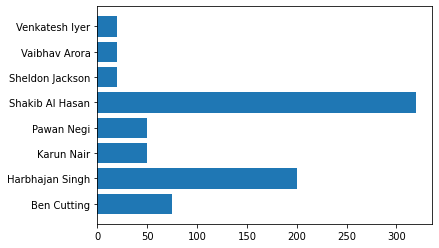

In [147]:
x=list(kkr['Player_Name']);
y=list(kkr['Price_Paid']);
plt.barh(x,y);

### List of Batsmen bought by KKR

In [148]:
kkr_bats=kkr[kkr['Role'].str.contains('Batsman')]
kkr_bats

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
19,Karun Nair,50,50,Sold,KKR,"RCB, DC, PBKS, RR",India,Batsman,Right,NaN,Middle,Capped
45,Sheldon Jackson,20,20,Sold,KKR,"RCB, KKR",India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped


### List of Bowlers bought by KKR

In [149]:
kkr_bowl=kkr[kkr['Role'].str.contains('Bowler')]
kkr_bowl

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
13,Harbhajan Singh,200,200,Sold,KKR,"CSK, MI",India,Spin Bowler,NaN,Right Offbreak,NaN,Capped
35,Pawan Negi,50,50,Sold,KKR,"DC, CSK, RCB",India,Spin Bowler,NaN,Slow Left Orthodox,NaN,Capped
53,Vaibhav Arora,20,20,Sold,KKR,NaN,India,Seam Bowler,NaN,Right Fast Medium,NaN,Uncapped


### List of All Rounders bought by KKR

In [150]:
kkr_all=kkr[kkr['Role'].str.contains('All Rounder')]
kkr_all

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
3,Ben Cutting,75,75,Sold,KKR,"RR, SRH, MI",Australia,All Rounder,Right,Right Fast Medium,Middle,Capped
44,Shakib Al Hasan,200,320,Sold,KKR,"KKR, SRH",Bangladesh,All Rounder,Left,Left Orthodox,Middle,Capped
54,Venkatesh Iyer,20,20,Sold,KKR,NaN,India,Batting All Rounder,Left,Right Medium,Top,Uncapped


## TEAM ANALYSIS - KOLKATA KNIGHT RIDERS

In [151]:
print("Total amount spent during auction: ",(kkr['Price_Paid'].sum())/100," crores")

Total amount spent during auction:  7.55  crores


In [152]:
print("Highest bid by Kolkata Knight Riders: ")
print()
formpri(kkr[kkr['Price_Paid']==kkr['Price_Paid'].max()])

Highest bid by Kolkata Knight Riders: 

Player Name:              Shakib Al Hasan
Country:                  Bangladesh
Bought for (in crores):   3.2
Role:                     All Rounder


In [153]:
print("Highest Indian bid by Kolkata Knight Riders: ")
print()
formpri(kkr[kkr['Price_Paid']==kkr[kkr['Country']=='India']['Price_Paid'].max()])

Highest Indian bid by Kolkata Knight Riders: 

Player Name:              Harbhajan Singh
Country:                  India
Bought for (in crores):   2.0
Role:                     Spin Bowler


In [154]:
print("Highest Foreign bid by Kolkata Knight Riders: ")
print()
formpri(kkr[kkr['Price_Paid']==kkr[kkr['Country']!='India']['Price_Paid'].max()])

Highest Foreign bid by Kolkata Knight Riders: 

Player Name:              Shakib Al Hasan
Country:                  Bangladesh
Bought for (in crores):   3.2
Role:                     All Rounder


In [155]:
print("Amount Spent on each Department: ")
print()
print((kkr.groupby('Role')['Price_Paid'].sum()/100).to_string())

Amount Spent on each Department: 

Role
All Rounder              3.95
Batsman                  0.50
Batting All Rounder      0.20
Seam Bowler              0.20
Spin Bowler              2.50
Wicket Keeper Batsman    0.20


In [156]:
print("Highest batsman bid by Kolkata Knight Riders: ")
print()
formpri(kkr_bats[kkr_bats['Price_Paid']==kkr_bats['Price_Paid'].max()])

Highest batsman bid by Kolkata Knight Riders: 

Player Name:              Karun Nair
Country:                  India
Bought for (in crores):   0.5
Role:                     Batsman


In [157]:
print("Highest bowler bid by Kolkata Knight Riders: ")
print()
formpri(kkr_bowl[kkr_bowl['Price_Paid']==kkr_bowl['Price_Paid'].max()])

Highest bowler bid by Kolkata Knight Riders: 

Player Name:              Harbhajan Singh
Country:                  India
Bought for (in crores):   2.0
Role:                     Spin Bowler


In [158]:
print("Highest all rounder bid by Kolkata Knight Riders: ")
print()
formpri(kkr_all[kkr_all['Price_Paid']==kkr_all['Price_Paid'].max()])

Highest all rounder bid by Kolkata Knight Riders: 

Player Name:              Shakib Al Hasan
Country:                  Bangladesh
Bought for (in crores):   3.2
Role:                     All Rounder


In [159]:
print("Average amount spent on each department: ")
print()
print((kkr.groupby('Role')['Price_Paid'].mean()/100).to_string())

Average amount spent on each department: 

Role
All Rounder              1.975
Batsman                  0.500
Batting All Rounder      0.200
Seam Bowler              0.200
Spin Bowler              1.250
Wicket Keeper Batsman    0.200


In [160]:
print("Highest capped bid by Kolkata Knight Riders: ")
print()
formpri(kkr[kkr['Price_Paid']==kkr[kkr['Capped_or_Uncapped']=='Capped']['Price_Paid'].max()])

Highest capped bid by Kolkata Knight Riders: 

Player Name:              Shakib Al Hasan
Country:                  Bangladesh
Bought for (in crores):   3.2
Role:                     All Rounder


In [161]:
print("Highest uncapped bid by Kolkata Knight Riders: ")
print()
kkr[kkr['Price_Paid']==kkr[kkr['Capped_or_Uncapped']=='Uncapped']['Price_Paid'].max()]

Highest uncapped bid by Kolkata Knight Riders: 



,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
45,Sheldon Jackson,20,20,Sold,KKR,"RCB, KKR",India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
53,Vaibhav Arora,20,20,Sold,KKR,NaN,India,Seam Bowler,NaN,Right Fast Medium,NaN,Uncapped
54,Venkatesh Iyer,20,20,Sold,KKR,NaN,India,Batting All Rounder,Left,Right Medium,Top,Uncapped


Visualization of distribution of Amount spent by KKR on each department: 



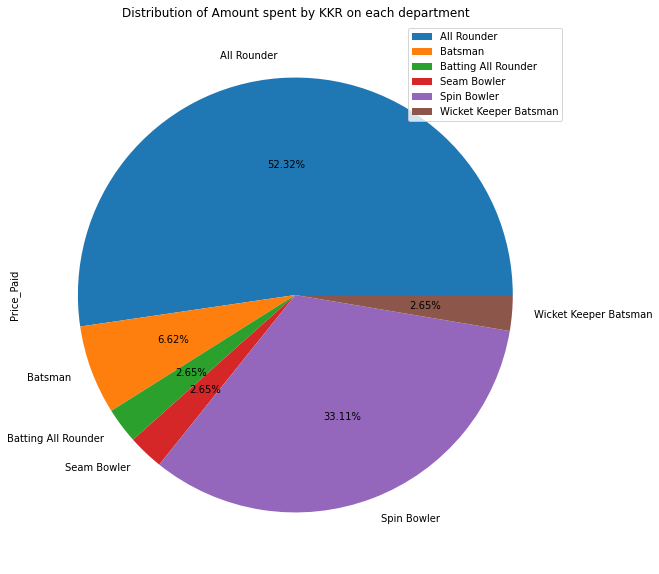

In [162]:
print("Visualization of distribution of Amount spent by KKR on each department: ")
print()
kkr.groupby(['Role']).sum().plot(kind='pie', y='Price_Paid', autopct="%.2f%%", figsize=(15,10), title="Distribution of Amount spent by KKR on each department").legend(loc='upper right');

In [163]:
print("No. of IPL Experienced and inexperienced Players bought by Kolkata Knight Riders: ")
print("Experienced Players:     ",kkr[pd.notnull(kkr['Previous_IPL_Teams'])].shape[0])
print("Inexperienced Players:   ",kkr[pd.isnull(kkr['Previous_IPL_Teams'])].shape[0])

No. of IPL Experienced and inexperienced Players bought by Kolkata Knight Riders: 
Experienced Players:      6
Inexperienced Players:    2


In [164]:
print("No. of Internationally Experienced and inexperienced  Players bought by Kolkata Knight Riders: ")
print("Experienced Players:     ",kkr[kkr['Capped_or_Uncapped']=='Capped'].shape[0])
print("Inexperienced Players:   ",kkr[kkr['Capped_or_Uncapped']=='Uncapped'].shape[0])

No. of Internationally Experienced and inexperienced  Players bought by Kolkata Knight Riders: 
Experienced Players:      5
Inexperienced Players:    3


In [165]:
print("No. of players bought at")
print("Base Price:           ",kkr[kkr['Price_Paid']==kkr['Base_Price']].shape[0])
print("More than Base Price: ",kkr[kkr['Price_Paid']!=kkr['Base_Price']].shape[0])

No. of players bought at
Base Price:            7
More than Base Price:  1


# Overall Analysis:

In [166]:
print("Highest bid - Overall: ")
print()
formpri(data[data['Price_Paid']==data['Price_Paid'].max()])

Highest bid - Overall: 

Player Name:              Chris Morris
Country:                  South Africa
Bought for (in crores):   16.25
Role:                     Bowling All Rounder


In [167]:
print("Highest Indian bid - Overall: ")
print()
formpri(data[data['Price_Paid']==data[data['Country']=='India']['Price_Paid'].max()])

Highest Indian bid - Overall: 

Player Name:              Krishnappa Gowtham
Country:                  India
Bought for (in crores):   9.25
Role:                     Bowling All Rounder


In [168]:
print("Highest Foreign bid - Overall: ")
print()
formpri(data[data['Price_Paid']==data[data['Country']!='India']['Price_Paid'].max()])

Highest Foreign bid - Overall: 

Player Name:              Chris Morris
Country:                  South Africa
Bought for (in crores):   16.25
Role:                     Bowling All Rounder


In [169]:
print("Highest batsman bid - Overall: ")
print()
data_bats=data[data['Role'].str.contains('Batsman')]

formpri(data_bats[data_bats['Price_Paid']==data_bats['Price_Paid'].max()])

Highest batsman bid - Overall: 

Player Name:              Shahrukh Khan
Country:                  India
Bought for (in crores):   5.25
Role:                     Batsman


In [170]:
print("Highest bowler bid - Overall: ")
print()
data_bowl=data[data['Role'].str.contains('Bowler')]

formpri(data_bowl[data_bowl['Price_Paid']==data_bowl['Price_Paid'].max()])

Highest bowler bid - Overall: 

Player Name:              Kyle Jamieson
Country:                  New Zealand
Bought for (in crores):   15.0
Role:                     Seam Bowler


In [171]:
print("Highest all rounder bid - Overall: ")
print()
data_all=data[data['Role'].str.contains('All Rounder')]

formpri(data_all[data_all['Price_Paid']==data_all['Price_Paid'].max()])

Highest all rounder bid - Overall: 

Player Name:              Chris Morris
Country:                  South Africa
Bought for (in crores):   16.25
Role:                     Bowling All Rounder


In [172]:
data_wk=data[data['Role'].str.contains('Wicket Keeper')]
data_wk

,Player_Name,Base_Price,Price_Paid,Status,Bought_by,Previous_IPL_Teams,Country,Role,Batting_Style,Bowling_Style,Batting_Order,Capped_or_Uncapped
30,Mohammed Azharuddeen,20,20,Sold,RCB,NaN,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
41,Sam Billings,200,200,Sold,DC,"DC, CSK",England,Wicket Keeper Batsman,Right,NaN,Middle,Capped
45,Sheldon Jackson,20,20,Sold,KKR,"RCB, KKR",India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
47,Srikar Bharat,20,20,Sold,RCB,DC,India,Wicket Keeper Batsman,Right,NaN,Top,Uncapped
55,Vishnu Vinod,20,20,Sold,DC,RCB,India,Wicket Keeper Batsman,Right,NaN,Middle,Uncapped


In [173]:
print("Total Amount spent on batsmen (in crores): ",data_bats['Price_Paid'].sum()/100)
print("Average Amount spent on batsmen (in crores): ",data_bats['Price_Paid'].mean()/100)

Total Amount spent on batsmen (in crores):  16.15
Average Amount spent on batsmen (in crores):  1.1535714285714287


In [174]:
print("Total Amount spent on Bowlers (in crores): ",data_bowl['Price_Paid'].sum()/100)
print("Average Amount spent on Bowlers (in crores): ",data_bowl['Price_Paid'].mean()/100)

Total Amount spent on Bowlers (in crores):  49.7
Average Amount spent on Bowlers (in crores):  2.3666666666666667


In [175]:
print("Total Amount spent on All Rounders (in crores): ",data_all['Price_Paid'].sum()/100)
print("Average Amount spent on All Rounders (in crores): ",data_all['Price_Paid'].mean()/100)

Total Amount spent on All Rounders (in crores):  82.75
Average Amount spent on All Rounders (in crores):  3.31
